In [21]:
# Import Libraries

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Python imports
import random
import re
from datetime import datetime
from functools import reduce

# Http clients
import requests
import urllib.request

# Open source libraries
from pandas_datareader import data as pdr
import yfinance as yf
import missingno as msno
import pandas_ta as ta

### Initial web scrapping

In [22]:
def function_to_request_data_by_url(url,column_name):
    '''This function is used for extracting data'''

    # Define the user agent header
    hdr = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

    # Fetch new Bitcoin data
    bitcoinreq = urllib.request.Request(url=url, headers=hdr)
    bitcoinresponse = urllib.request.urlopen(bitcoinreq)
    bitcoinhtml = bitcoinresponse.read().decode()  # Decode the byte data to string
    bitcoindata = re.findall("""new Date\("(\d\d\d\d\/\d\d\/\d\d)"\),(.*?)\]""", bitcoinhtml)
    df = pd.DataFrame(bitcoindata, columns=['Date', column_name])
    df[column_name] = pd.to_numeric(df[column_name],errors='coerce')
    df['Date'] = [datetime.strptime(date, '%Y/%m/%d') for date in df['Date']]
    df.sort_values(by='Date', inplace = True)
    return df

# DataFrame features by location 
df_bitcoinprice = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/bitcoin-price.html', column_name="Average_price_per_day")
df_transactionsperday = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/bitcoin-transactions.html#alltimee', column_name="Number_of_transactions_in_blockchain_per_day")
df_Averageblocksize = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/size-btc.html#alltime', column_name="Average_block_size")
df_Numberofuniqueaddressesperday = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/sentbyaddress-btc.html#alltime', column_name="Number_of_unique_(from)_addresses_per_day")
df_Averageminingdifficultyperday = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/bitcoin-difficulty.html#alltime', column_name="Average_mining_difficulty_per_day")
df_Averagehashrateperday = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/bitcoin-hashrate.html#alltime', column_name="Average_hashrate_(hash/s)_per_day")
df_MiningProfitability = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/bitcoin-mining_profitability.html#alltime', column_name="Mining_Profitability")
df_SentcoinsinUSDperday = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/sentinusd-btc.html#alltime', column_name="Sent_coins_in_USD_per_day")
df_Averagetransactionfee = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/bitcoin-transactionfees.html#alltime', column_name="Average_transaction_fee")
df_Mediantransactionfee = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/bitcoin-median_transaction_fee.html#alltime', column_name="Median_transaction_fee")
df_Averageblocktime = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/bitcoin-confirmationtime.html#alltime', column_name="Average_block_time_(minutes)")
df_MarketCapitalization = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/bitcoin-marketcap.html#alltime', column_name="Market_Capitalization")
df_AvgTransactionValue = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/transactionvalue-btc.html#alltime', column_name="Avg._Transaction_Value")
df_MedianTransactionValue = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/mediantransactionvalue-btc.html#alltime', column_name="Median_Transaction_Value")
df_Tweetsperday = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/tweets-btc.html#alltime', column_name="Tweets_per_day")
df_GoogleTrendstoBitcoin = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/google_trends-btc.html#alltime', column_name='Google_Trends_to_"Bitcoin"')
df_Numberofuniqueaddressestoperday = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/activeaddresses-btc.html#alltime', column_name="Number_of_unique_(FromOrTo)_addresses_per_day")
df_Top100RichestAddressestoTotalcoins = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/top100cap-btc.html#alltime', column_name="Top_100_Richest_Addresses_to_Total_coins_%")
df_AverageFeePercentageinTotalBlockReward = function_to_request_data_by_url(url='https://bitinfocharts.com/comparison/fee_to_reward-btc.html#alltime', column_name="Average_Fee_Percentage_in_Total_Block_Reward")


### Get additional data from Yahoo finance

In [23]:
yf.pdr_override()
y_symbols = ['BTC-USD']

startdate = datetime(2012,12,1)
enddate = datetime.now()
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)
data.to_csv('Bitcoin-historical_online.csv', index=True)

# Read .csv file
df_OHLC_online = pd.read_csv('Bitcoin-historical_online.csv')
df_OHLC_online['Date'] = pd.to_datetime(df_OHLC_online['Date'])

# Import old data from 2010 to 2014-09-16
df_OHLC_offline = pd.read_csv('Bitcoin-2014-09-16_to_Jul-17-2010.csv')
df_OHLC_offline['Date'] = pd.to_datetime(df_OHLC_offline['Date'])

# Combining both dataframes
df_OHLC_Complete = pd.concat([df_OHLC_online, df_OHLC_offline],join="outer", ignore_index=True)
df_OHLC_Complete.sort_values(by='Date', inplace = True)
pd.reset_option('display.float_format')

# Drop irrelevant features
df_OHLC = df_OHLC_Complete.drop(labels=['Adj Close', 'Volume', 'Market Cap'], axis=1)
df_OHLC

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close
4662,2010-07-17,0.050000,0.050000,0.050000,0.050000
4661,2010-07-18,0.085800,0.085800,0.085800,0.085800
4660,2010-07-19,0.080800,0.080800,0.080800,0.080800
4659,2010-07-20,0.074700,0.074700,0.074700,0.074700
4658,2010-07-21,0.079200,0.079200,0.079200,0.079200
...,...,...,...,...,...
3135,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734
3136,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688
3137,2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281
3138,2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156


### Merge all dataframes 

In [24]:
# Define list of DataFrames
dfs = [df_OHLC,df_bitcoinprice,df_transactionsperday,df_Averageblocksize,df_Numberofuniqueaddressesperday,df_Averageminingdifficultyperday,df_Averagehashrateperday,df_MiningProfitability,df_SentcoinsinUSDperday,df_Averagetransactionfee,df_Mediantransactionfee,df_Averageblocktime,df_MarketCapitalization,df_AvgTransactionValue,df_MedianTransactionValue,df_Tweetsperday,df_GoogleTrendstoBitcoin,df_Numberofuniqueaddressestoperday,df_Top100RichestAddressestoTotalcoins,df_AverageFeePercentageinTotalBlockReward]

# Merge DataFrames into one
All_df = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), dfs)

# Sort by date
All_df.sort_values(by='Date', inplace = True)

# Convert values to float
pd.set_option('display.float_format', lambda x: '%.2f' % x)

All_df.tail()

,Date,Open,High,Low,Close,Average_price_per_day,Number_of_transactions_in_blockchain_per_day,Average_block_size,Number_of_unique_(from)_addresses_per_day,Average_mining_difficulty_per_day,...,Median_transaction_fee,Average_block_time_(minutes),Market_Capitalization,Avg._Transaction_Value,Median_Transaction_Value,Tweets_per_day,"Google_Trends_to_""Bitcoin""",Number_of_unique_(FromOrTo)_addresses_per_day,Top_100_Richest_Addresses_to_Total_coins_%,Average_Fee_Percentage_in_Total_Block_Reward
4659,2023-04-19,30394.19,30411.05,28669.90,28822.68,29596.00,301583.00,734683.00,503597.00,47887764338536.00,...,0.84,10.36,572697182702.00,77062.00,405.54,NaN,NaN,857838.00,14.87,2.35
4660,2023-04-20,28823.68,29076.40,28037.26,28245.99,28670.00,296550.00,737124.00,483142.00,48296984989381.00,...,0.93,10.83,554803703757.00,76195.00,415.45,NaN,NaN,806225.00,14.87,2.49
4661,2023-04-21,28249.23,28349.97,27177.37,27276.91,27967.00,352073.00,740096.00,530510.00,48712405953118.00,...,0.88,9.93,541223680202.00,66515.00,237.78,NaN,NaN,912805.00,14.92,2.59
4662,2023-04-22,27274.15,27385.10,27175.15,27338.38,27454.00,354603.00,663259.00,326085.00,48712405953118.00,...,0.52,9.66,531332823701.00,42787.00,93.58,NaN,NaN,814125.00,14.94,1.73
4663,2023-04-23,NaN,NaN,NaN,NaN,27484.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,678744.00,14.90,NaN


### Visualization of any missing values/data

Date                                                0
Open                                              561
High                                              561
Low                                               561
Close                                             561
Average_price_per_day                             560
Number_of_transactions_in_blockchain_per_day      261
Average_block_size                                  6
Number_of_unique_(from)_addresses_per_day           8
Average_mining_difficulty_per_day                   6
Average_hashrate_(hash/s)_per_day                   7
Mining_Profitability                              561
Sent_coins_in_USD_per_day                         561
Average_transaction_fee                           641
Median_transaction_fee                           1205
Average_block_time_(minutes)                        8
Market_Capitalization                             561
Avg._Transaction_Value                            561
Median_Transaction_Value    

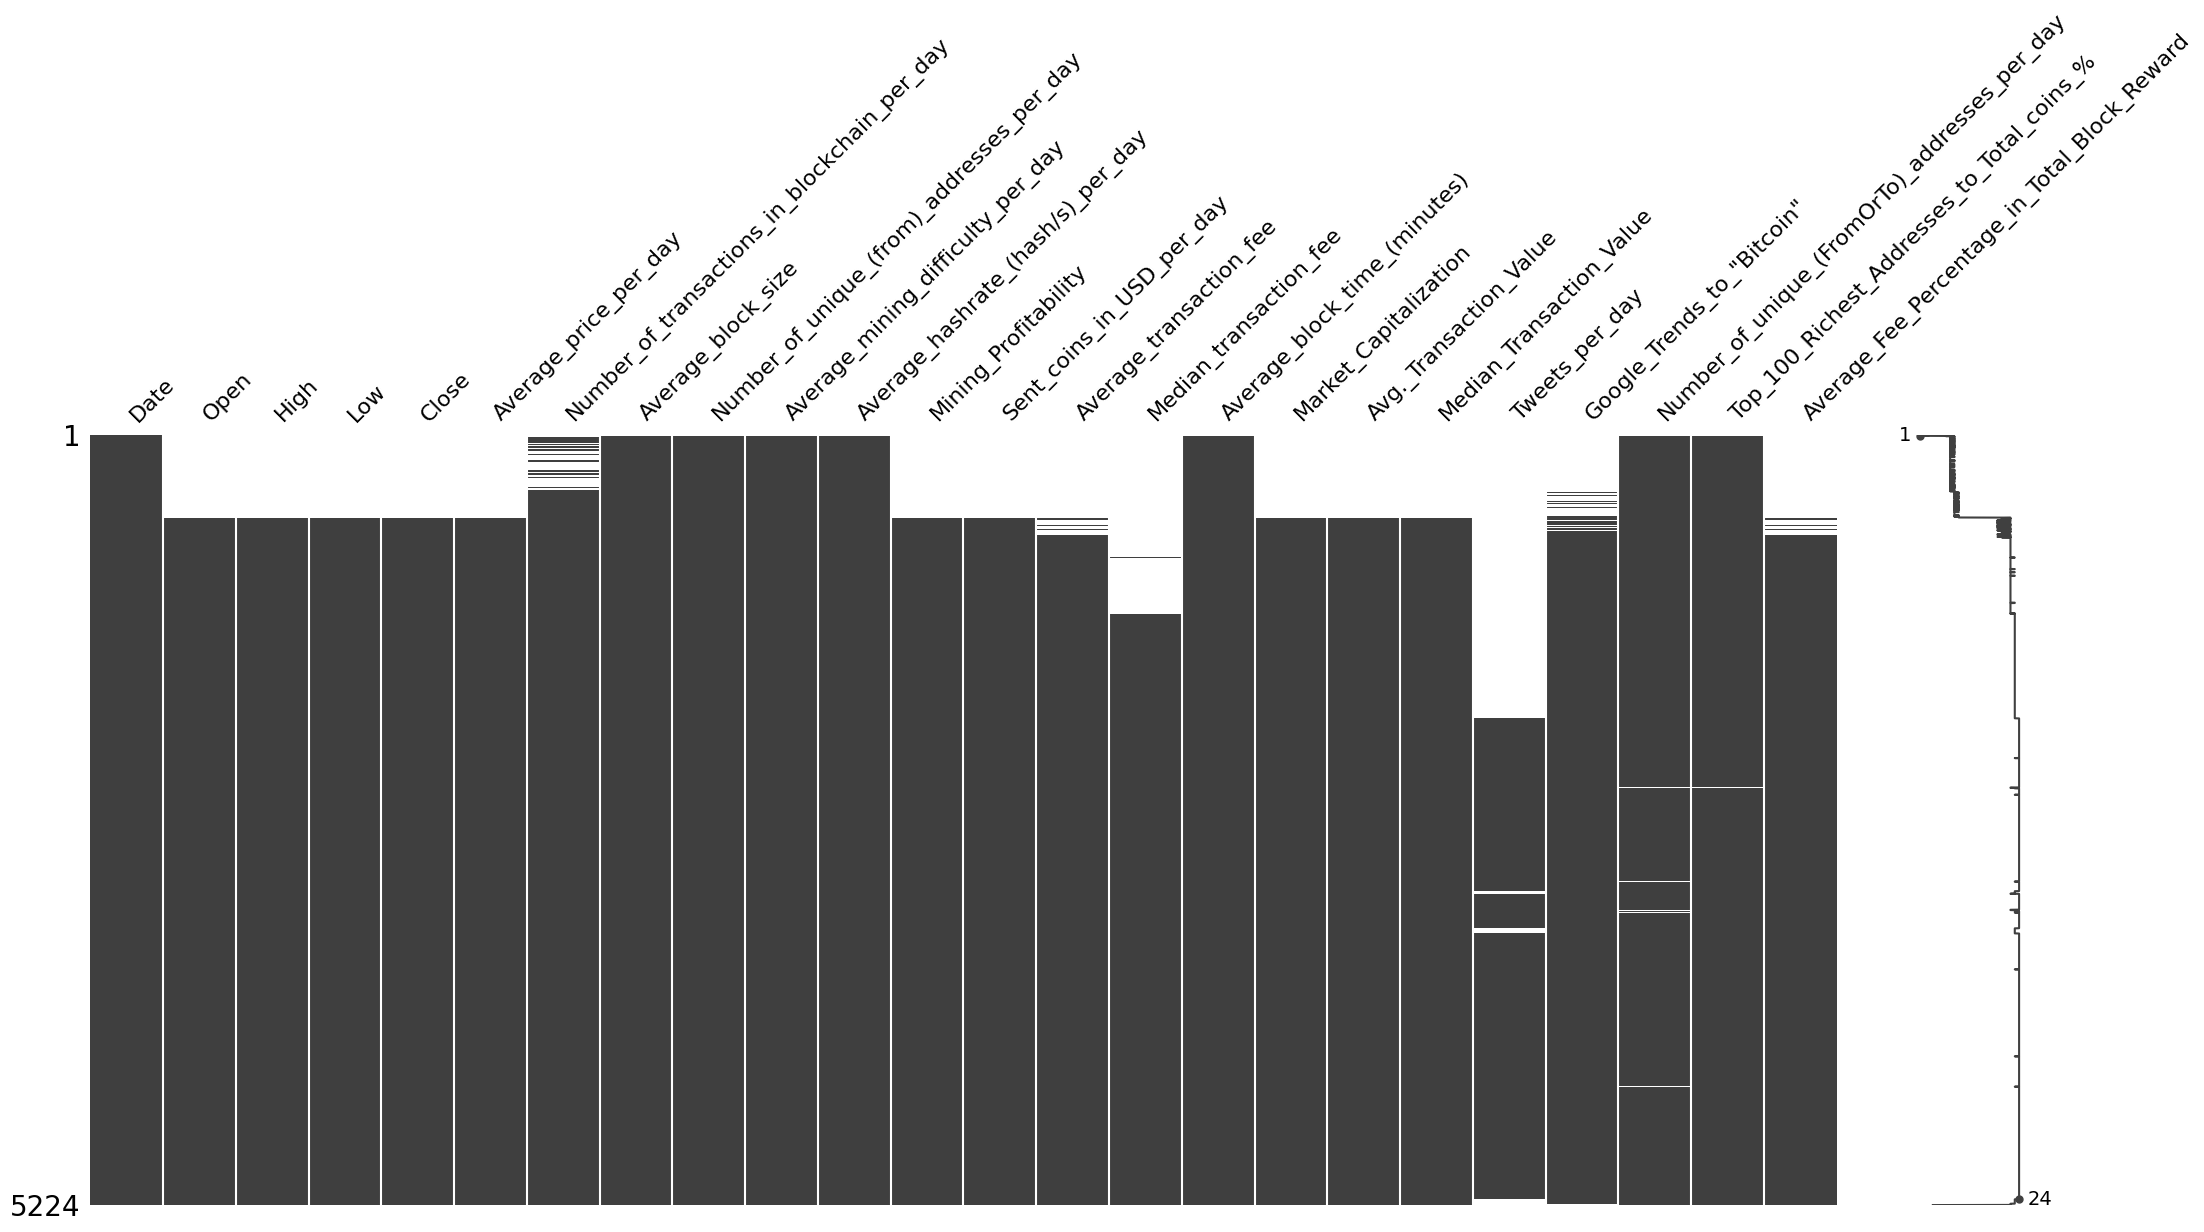

In [25]:
# Plot NaN/null values for each feature

msno.matrix(All_df)
All_df.isnull().sum()

### Drop NaN/null rows based on 'Close' column

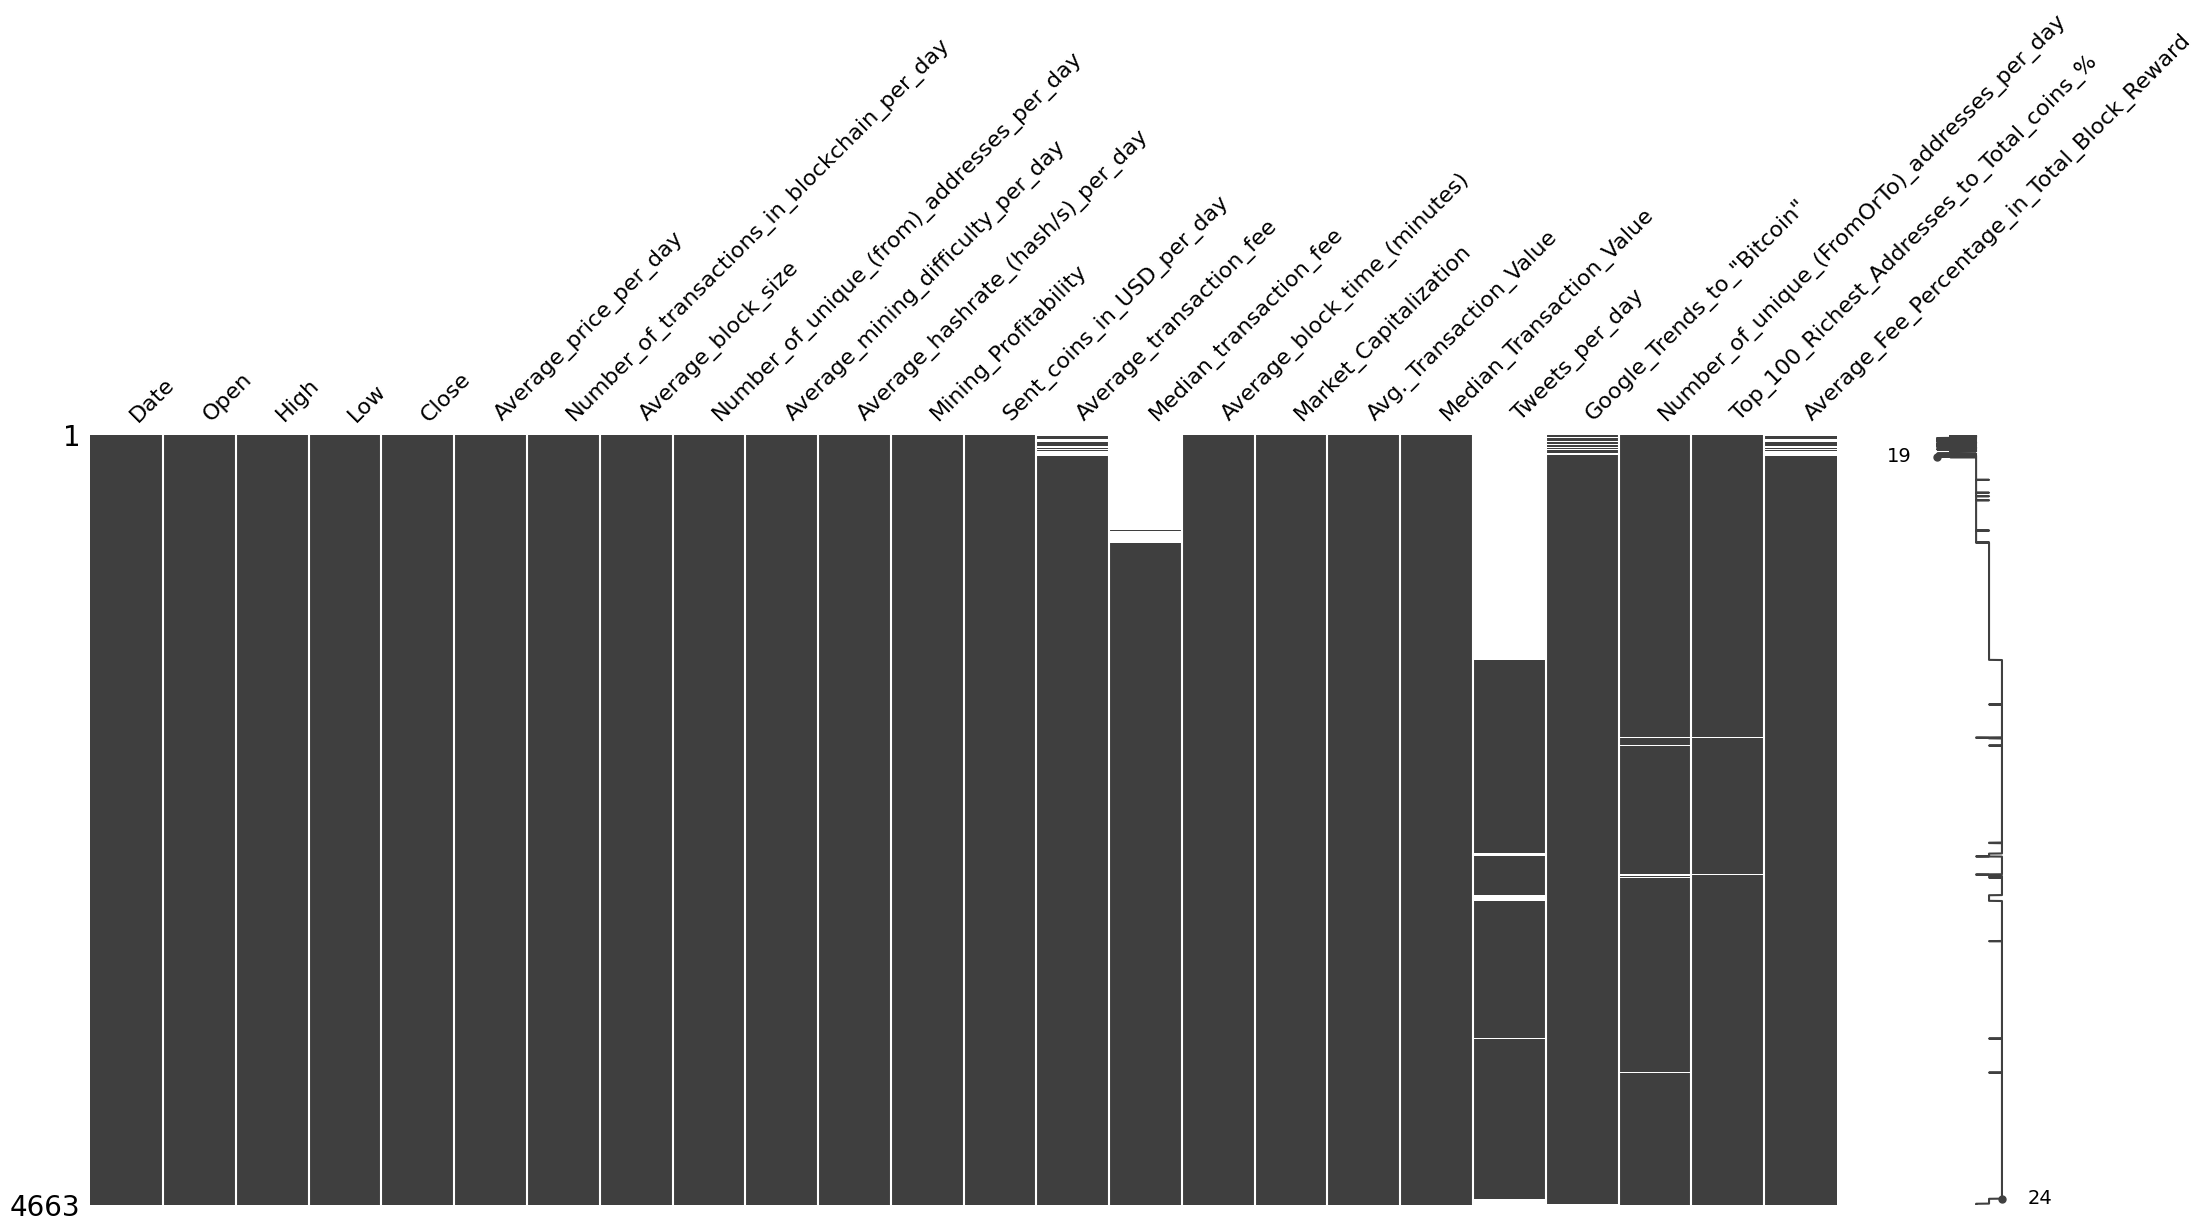

In [26]:
updated_df = All_df.dropna(subset=['Close'])

#Plot that shows NaN/null values in each column
msno.matrix(updated_df)
df_final = updated_df.copy()

In [27]:
# Second check of NaN/null values

df_final.isnull().sum()

Date                                                0
Open                                                0
High                                                0
Low                                                 0
Close                                               0
Average_price_per_day                               0
Number_of_transactions_in_blockchain_per_day        0
Average_block_size                                  0
Number_of_unique_(from)_addresses_per_day           0
Average_mining_difficulty_per_day                   0
Average_hashrate_(hash/s)_per_day                   0
Mining_Profitability                                0
Sent_coins_in_USD_per_day                           0
Average_transaction_fee                            80
Median_transaction_fee                            644
Average_block_time_(minutes)                        1
Market_Capitalization                               0
Avg._Transaction_Value                              0
Median_Transaction_Value    

### Add Target variable for testing and modeling

In [28]:
# Target will be the future closing price in 7 days

df_final['next_7th_day_closing_price'] = df_final['Close'].shift(-7)
df_final.drop(df_final.tail(7).index,inplace=True)
df_final.tail(10)

,Date,Open,High,Low,Close,Average_price_per_day,Number_of_transactions_in_blockchain_per_day,Average_block_size,Number_of_unique_(from)_addresses_per_day,Average_mining_difficulty_per_day,...,Average_block_time_(minutes),Market_Capitalization,Avg._Transaction_Value,Median_Transaction_Value,Tweets_per_day,"Google_Trends_to_""Bitcoin""",Number_of_unique_(FromOrTo)_addresses_per_day,Top_100_Richest_Addresses_to_Total_coins_%,Average_Fee_Percentage_in_Total_Block_Reward,next_7th_day_closing_price
4646,2023-04-06,28175.23,28178.38,27738.76,28044.14,28022.00,353859.00,678619.00,579642.00,47189345878587.00,...,9.00,541912369409.00,81598.00,271.93,NaN,19.98,896827.00,14.82,3.19,30399.07
4647,2023-04-07,28038.97,28111.59,27794.03,27925.86,27956.00,354889.00,704169.00,587694.00,47887764338536.00,...,10.14,540661825919.00,60798.00,208.57,NaN,20.01,826662.00,14.83,2.96,30485.70
4648,2023-04-08,27920.51,28159.86,27883.39,27947.79,28013.00,318358.00,591897.00,526522.00,47887764338536.00,...,9.80,541787981029.00,51238.00,172.21,NaN,17.28,747442.00,14.83,2.33,30318.50
4649,2023-04-09,27952.37,28532.83,27828.48,28333.05,28031.00,278258.00,669688.00,450821.00,47887764338536.00,...,9.86,542165590263.00,59450.00,160.30,NaN,16.98,824507.00,14.83,1.82,30315.36
4650,2023-04-10,28336.03,29771.46,28189.27,29652.98,28605.00,289502.00,779563.00,503810.00,47887764338536.00,...,11.71,553277125579.00,93579.00,324.92,NaN,20.01,844944.00,14.81,2.76,29445.04
4651,2023-04-11,29653.68,30509.08,29609.30,30235.06,30106.00,384848.00,775544.00,626221.00,47887764338536.00,...,9.35,582355290851.00,75280.00,335.00,NaN,29.41,1012733.00,14.95,3.13,30397.55
4652,2023-04-12,30231.58,30462.48,29725.57,30139.05,30012.00,337942.00,677194.00,573142.00,47887764338536.00,...,9.00,580549842279.00,104923.00,321.00,NaN,24.26,926495.00,14.92,2.40,28822.68
4653,2023-04-13,29892.74,30539.85,29878.62,30399.07,30217.00,331900.00,733547.00,578882.00,47887764338536.00,...,10.14,584548379962.00,70829.00,341.02,NaN,22.44,877488.00,14.94,2.84,28245.99
4654,2023-04-14,30409.56,31005.61,30044.50,30485.70,30588.00,315819.00,738881.00,583697.00,47887764338536.00,...,10.29,591763455306.00,99608.00,429.06,NaN,NaN,850714.00,14.85,3.07,27276.91
4655,2023-04-15,30490.75,30601.74,30245.88,30318.50,30376.00,276027.00,719191.00,515619.00,47887764338536.00,...,9.11,587688189115.00,84421.00,335.14,NaN,NaN,937582.00,14.87,2.10,27338.38


### Missing Value Imputation

In [29]:
def Value_Imputation(df,feature_name):
    df[f'{feature_name}'].fillna(df[f'{feature_name}'].rolling(40, min_periods=1).mean()).bfill().astype(float).plot(x=df['Date'],y=feature_name,figsize=(25,5),grid=True)
    for i in list(df.loc[pd.isna(df[f'{feature_name}']), :].index):
        plt.axvline(x=i,color='r',alpha=0.1)
    plt.ylabel(feature_name)
    plt.title(f'Date VS {feature_name} (highlighted missing values)')
    plt.show()
    df[f'{feature_name}'] = df[f'{feature_name}'].fillna(df[f'{feature_name}'].rolling(40, min_periods=1).mean()).bfill()

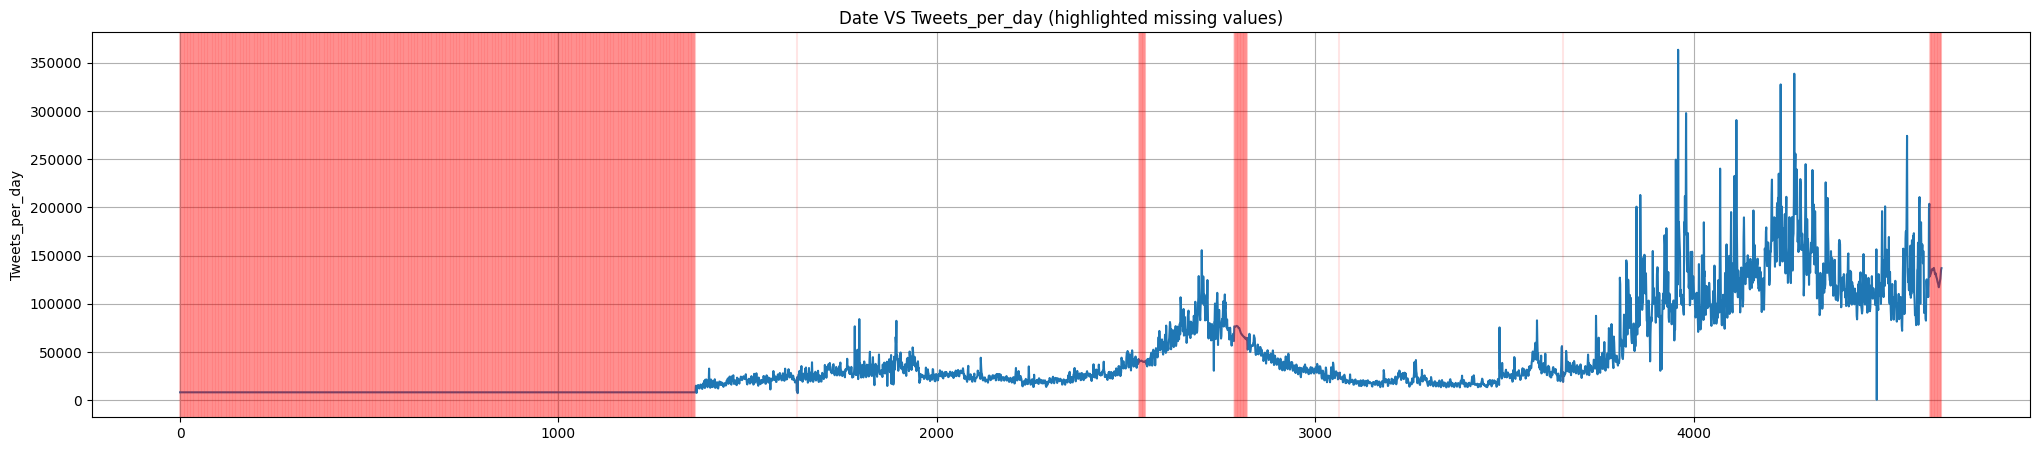

In [30]:
Value_Imputation(df_final,'Tweets_per_day')

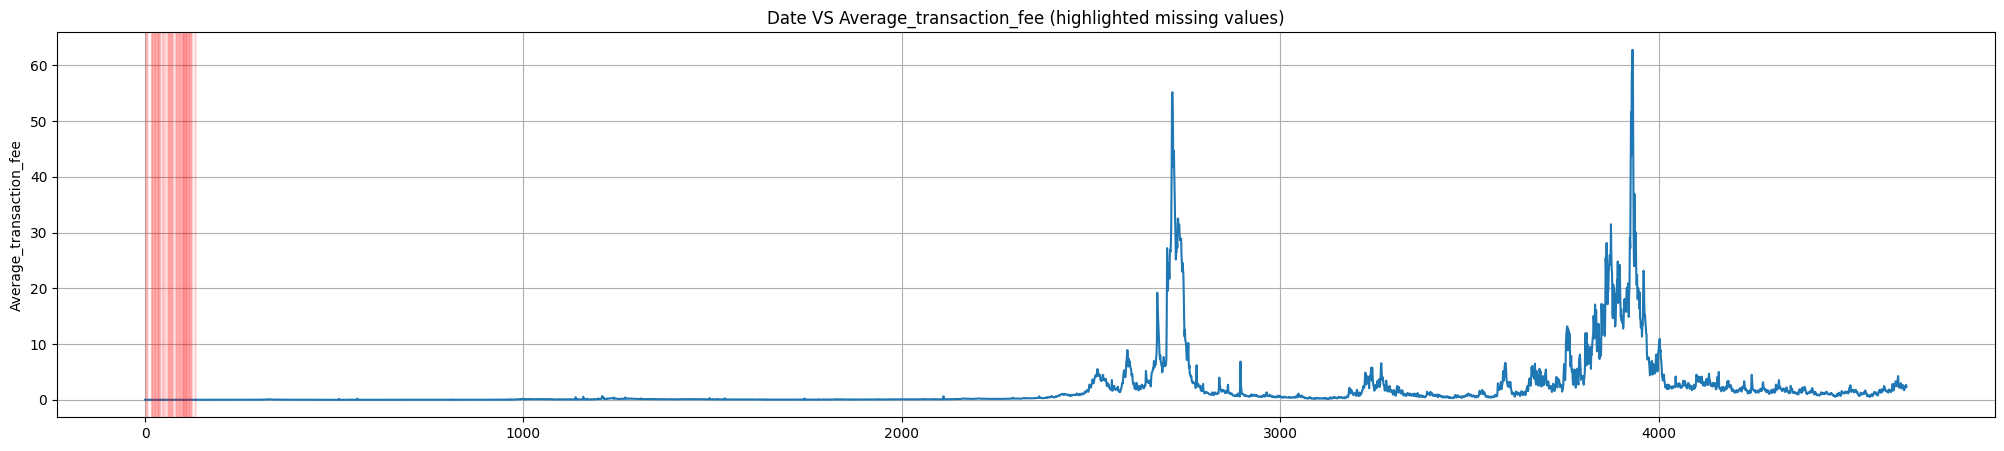

In [31]:
Value_Imputation(df_final,'Average_transaction_fee')

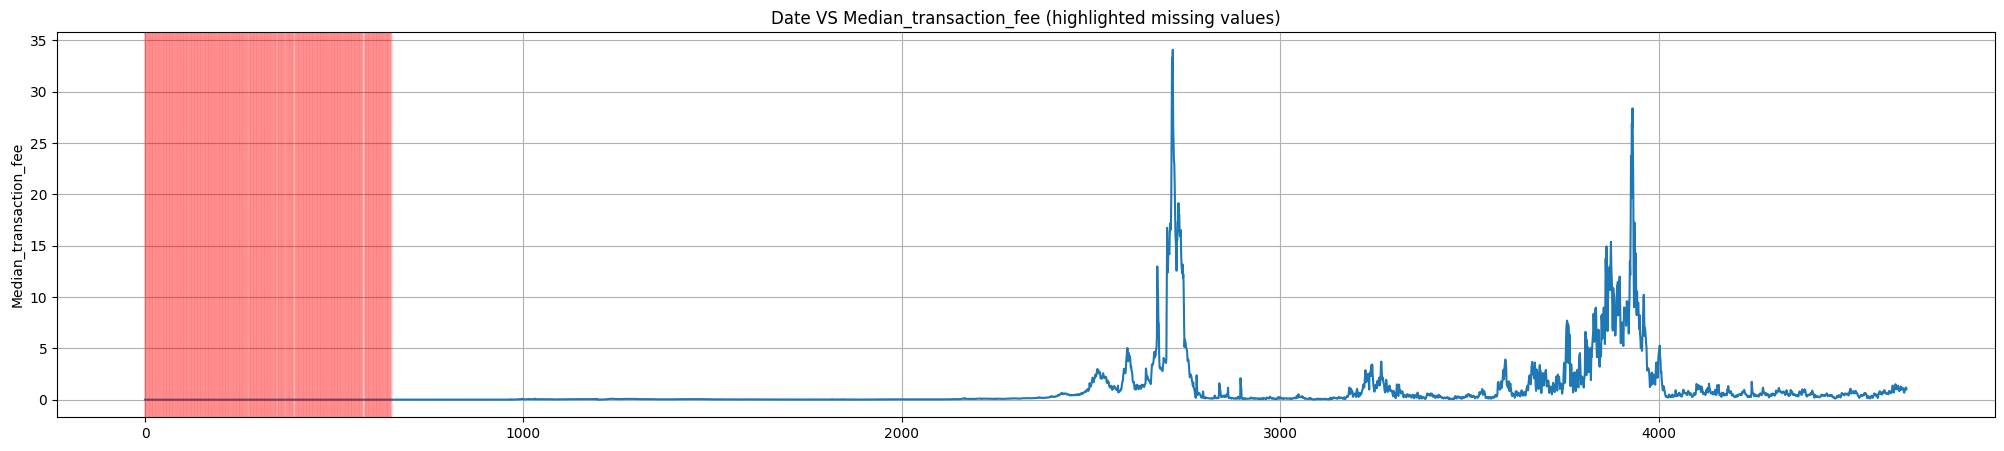

In [32]:
Value_Imputation(df_final,'Median_transaction_fee')

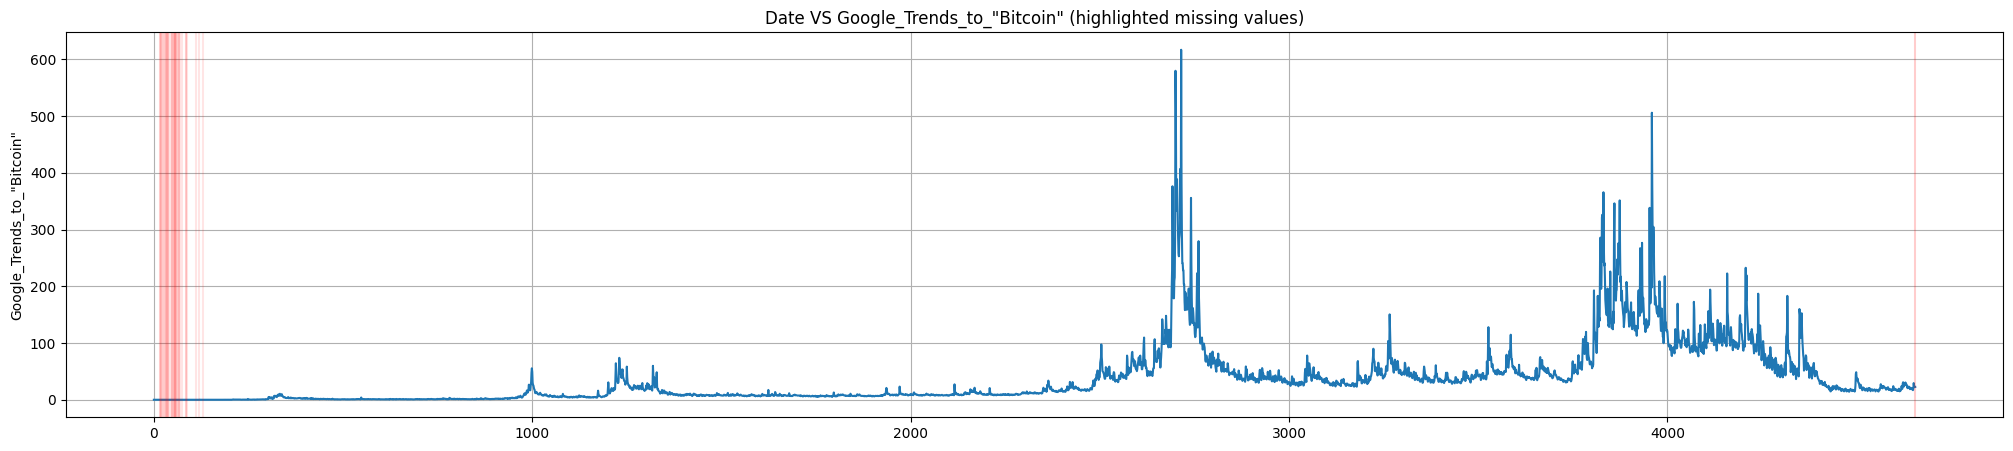

In [33]:
Value_Imputation(df_final,'Google_Trends_to_"Bitcoin"')

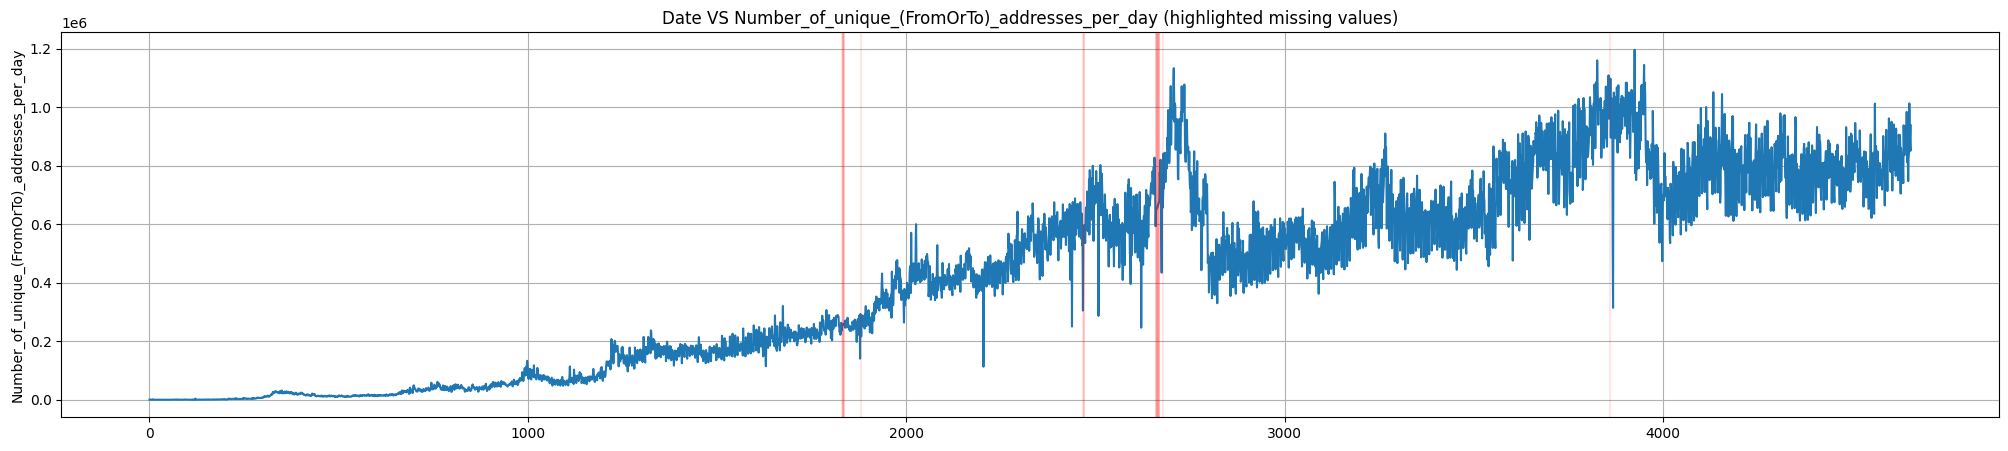

In [34]:
Value_Imputation(df_final,'Number_of_unique_(FromOrTo)_addresses_per_day')

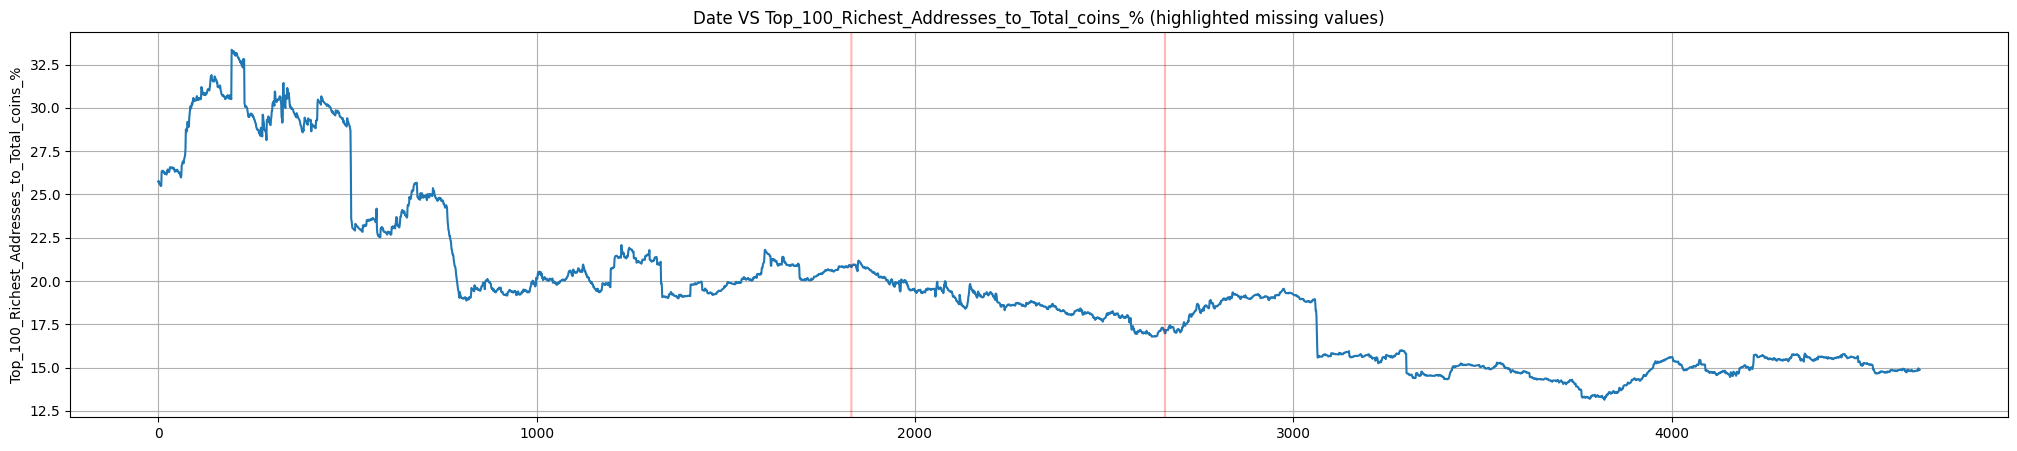

In [35]:
Value_Imputation(df_final,'Top_100_Richest_Addresses_to_Total_coins_%')

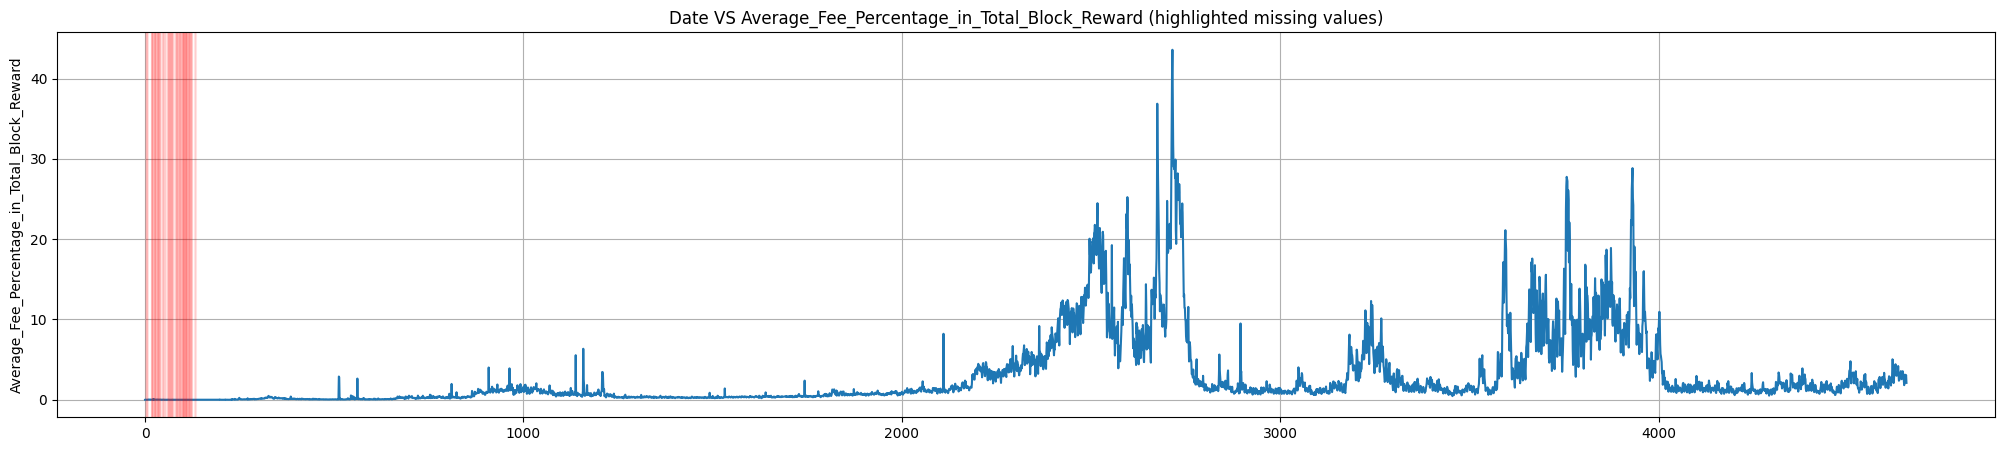

In [36]:
Value_Imputation(df_final,'Average_Fee_Percentage_in_Total_Block_Reward')

In [37]:
# Final check of any NaN/null values

df_final.isnull().sum()

Date                                             0
Open                                             0
High                                             0
Low                                              0
Close                                            0
Average_price_per_day                            0
Number_of_transactions_in_blockchain_per_day     0
Average_block_size                               0
Number_of_unique_(from)_addresses_per_day        0
Average_mining_difficulty_per_day                0
Average_hashrate_(hash/s)_per_day                0
Mining_Profitability                             0
Sent_coins_in_USD_per_day                        0
Average_transaction_fee                          0
Median_transaction_fee                           0
Average_block_time_(minutes)                     1
Market_Capitalization                            0
Avg._Transaction_Value                           0
Median_Transaction_Value                         0
Tweets_per_day                 

In [38]:
df_final.to_csv('final_data.csv',index=False)